# Watersheds Segmentation <a href="https://mybinder.org/v2/gh/InsightSoftwareConsortium/SimpleITK-Notebooks/master?filepath=Python%2F32_Watersheds_Segmentation.ipynb"><img style="float: right;" src="https://mybinder.org/badge_logo.svg"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
from myshow import myshow, myshow3d



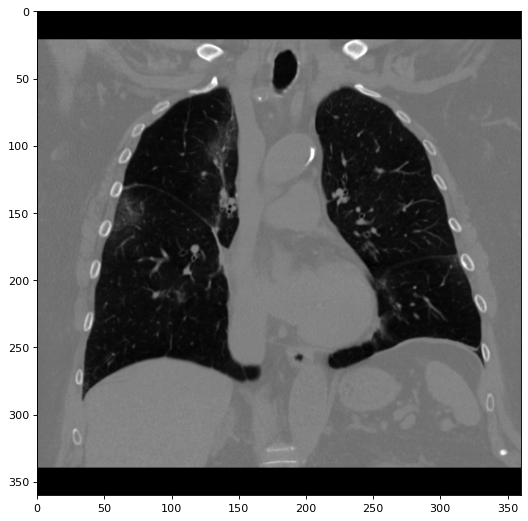

In [2]:
img = sitk.ReadImage('C:/Users/sraza/OneDrive/Desktop/60.png')
myshow(img)

## Gradient Watersheds Segmentation

In [3]:
sigma=img.GetSpacing()[0]
level=3

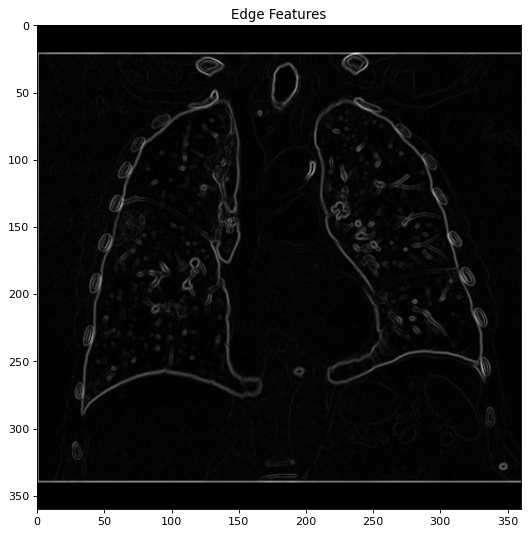

In [4]:
feature_img = sitk.GradientMagnitude(img)
myshow(feature_img, "Edge Features")

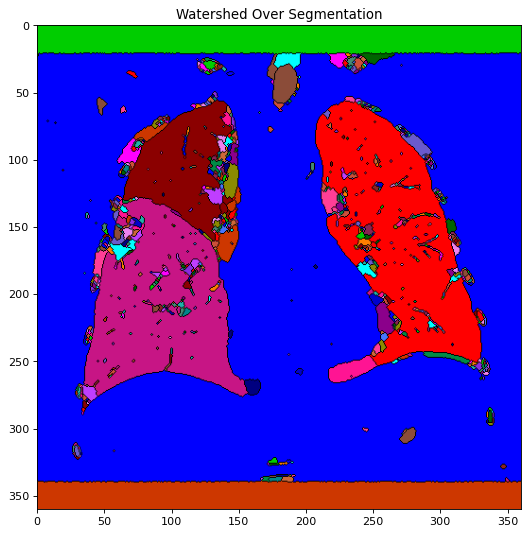

In [5]:
ws_img = sitk.MorphologicalWatershed(feature_img, level= 5, markWatershedLine=True, fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Over Segmentation")

In [6]:
from ipywidgets import interact, interactive, FloatSlider

def callback(feature_img,*args, **kwargs):
    ws_img = sitk.MorphologicalWatershed(feature_img,*args, **kwargs)
    
    myshow(sitk.LabelToRGB(ws_img), "Watershed Segmentation")
    
interact(lambda **kwargs: callback(feature_img, **kwargs),
             markWatershedLine=True,
             fullyConnected=False,
             level=FloatSlider(min=0, max=255, step=0.1, value=4.0) )


interactive(children=(Checkbox(value=True, description='markWatershedLine'), Checkbox(value=False, description…

<function __main__.<lambda>(**kwargs)>

## Segmentation From Markers

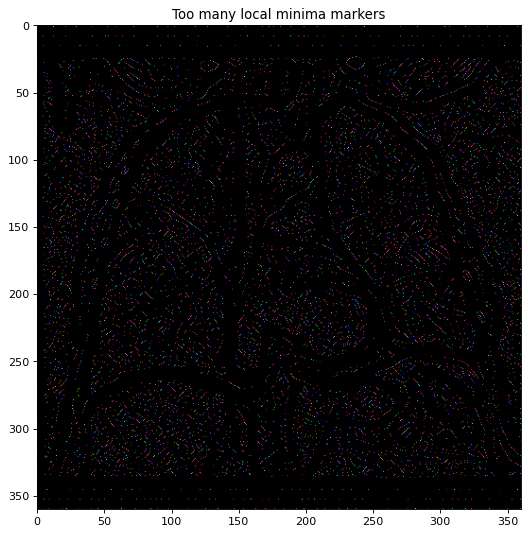

In [25]:
min_img = sitk.RegionalMinima(feature_img, backgroundValue=0.0, foregroundValue=1.0, fullyConnected=False, flatIsMinima=True)
marker_img = sitk.ConnectedComponent(min_img)
myshow(sitk.LabelToRGB(marker_img), "Too many local minima markers")

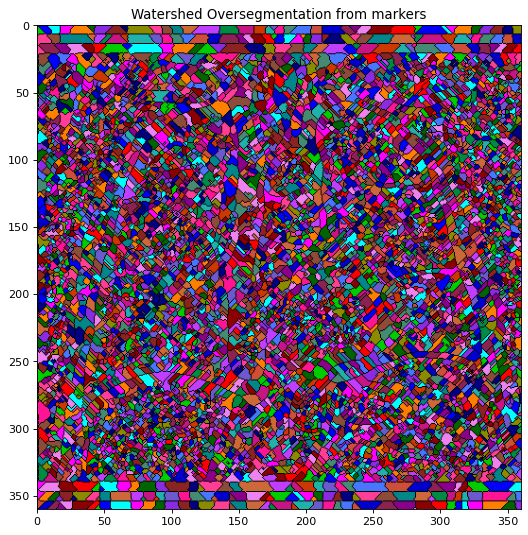

In [27]:
ws = sitk.MorphologicalWatershedFromMarkers(feature_img, marker_img, markWatershedLine=True, fullyConnected=False)
myshow(sitk.LabelToRGB(ws), "Watershed Oversegmentation from markers")

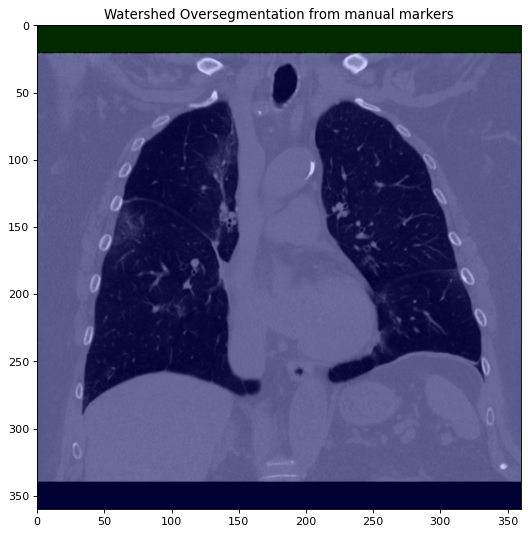

In [9]:
pt = [60,60]
idx = img.TransformPhysicalPointToIndex(pt)
marker_img *= 0
marker_img[0,0] = 1
marker_img[idx] = 2

ws = sitk.MorphologicalWatershedFromMarkers(feature_img, marker_img, markWatershedLine=True, fullyConnected=False)
myshow(sitk.LabelOverlay(img, ws, opacity=.2), "Watershed Oversegmentation from manual markers")

## Binary Watersheds for Object Separation 

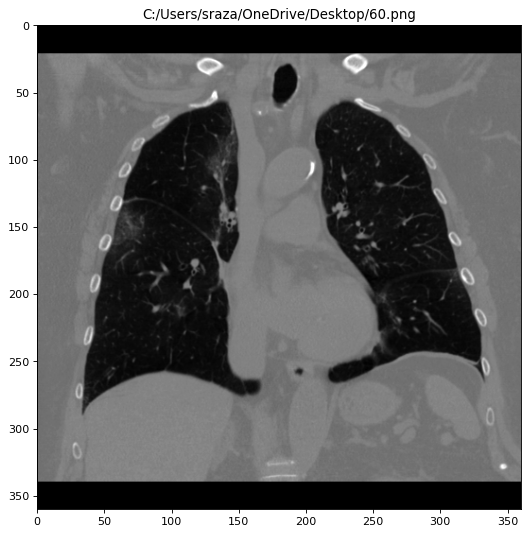

RuntimeError: Exception thrown in SimpleITK VectorIndexSelectionCast: d:\a\1\work\code\common\include\sitkDualMemberFunctionFactory.hxx:178:
sitk::ERROR: Pixel type: 8-bit unsigned integer is not supported in 2D byclass itk::simple::VectorIndexSelectionCastImageFilter

In [10]:
rgb_img = sitk.ReadImage('C:/Users/sraza/OneDrive/Desktop/60.png')
myshow(rgb_img, 'C:/Users/sraza/OneDrive/Desktop/60.png')
img = sitk.VectorIndexSelectionCast(rgb_img,1)
myshow(img, "Green Coins")

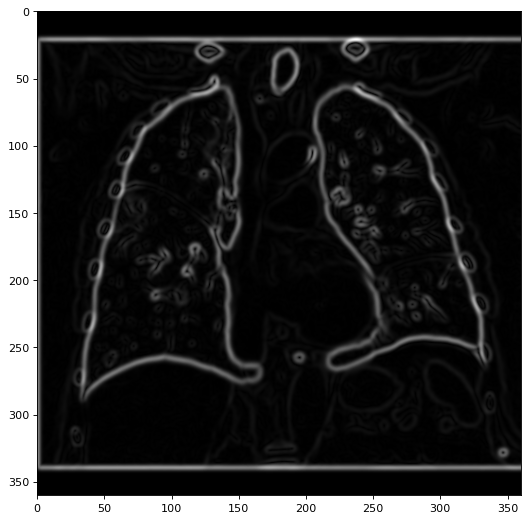

In [11]:
feature_img = sitk.GradientMagnitudeRecursiveGaussian(img, sigma=1.5)
myshow(feature_img)

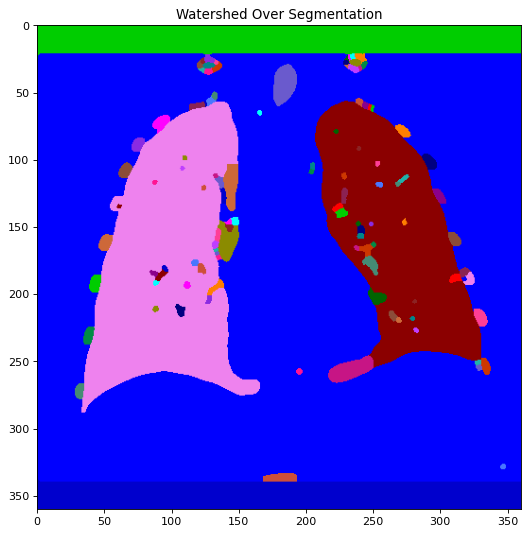

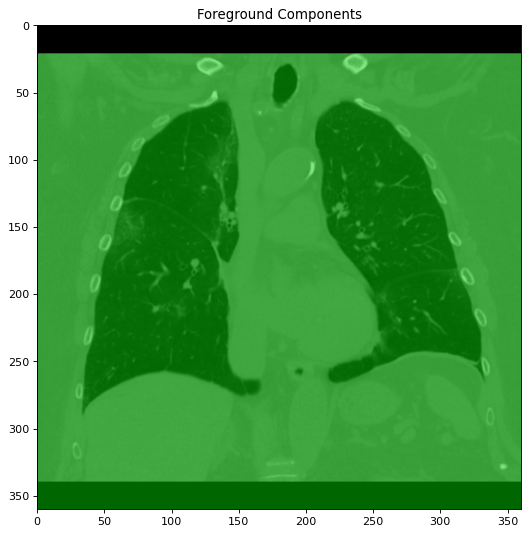

In [12]:
ws_img = sitk.MorphologicalWatershed(feature_img, level=4, markWatershedLine=False, fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Over Segmentation")
seg = sitk.ConnectedComponent(ws_img!=ws_img[0,0])
myshow(sitk.LabelOverlay(img, seg), "Foreground Components")

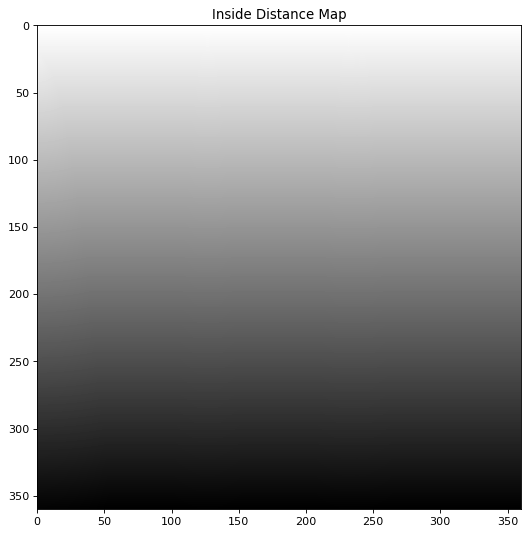

In [13]:
filled = sitk.BinaryFillhole(seg!=0)
d = sitk.SignedMaurerDistanceMap(filled, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)
myshow(d, "Inside Distance Map")

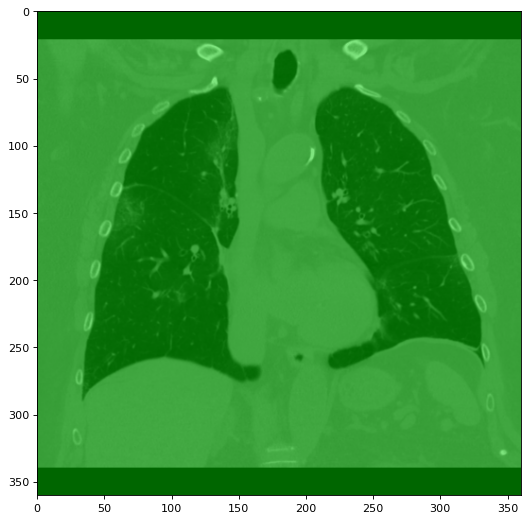

In [14]:
ws = sitk.MorphologicalWatershed( d, markWatershedLine=False, level=1)
myshow(sitk.LabelOverlay(img, ws))

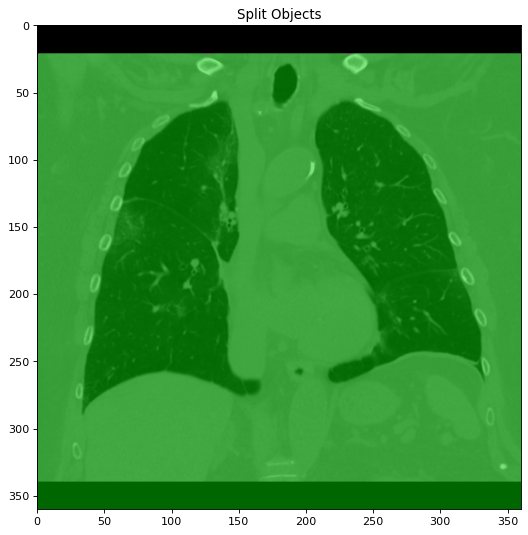

In [15]:
ws = sitk.Mask( ws, sitk.Cast(seg, ws.GetPixelID()))
myshow(sitk.LabelOverlay(img, ws), "Split Objects")

# Multi-label Morphology

In [16]:
seg = ws

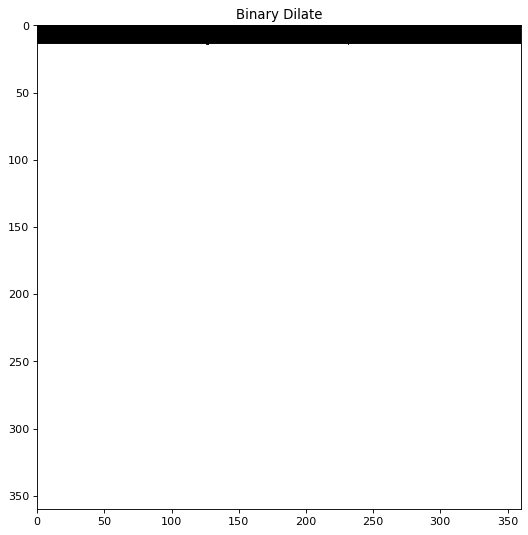

In [17]:
radius=10
bd_img = sitk.BinaryDilate(seg!=0, [radius]*seg.GetDimension())
myshow(bd_img, "Binary Dilate")

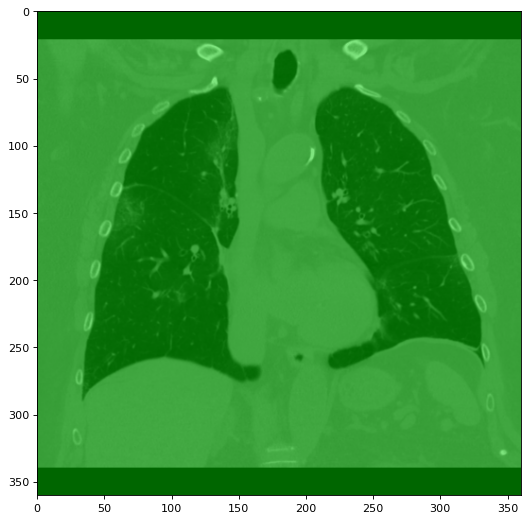

In [18]:
dist_img = sitk.SignedMaurerDistanceMap(seg!=0, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)
wsd_img = sitk.MorphologicalWatershedFromMarkers(dist_img, seg, markWatershedLine=False)
myshow(sitk.LabelOverlay(img,wsd_img))

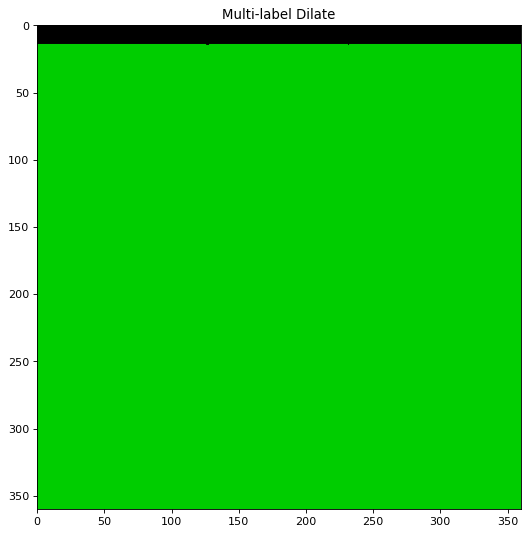

In [19]:
md_img = sitk.Mask(wsd_img,bd_img)
myshow(sitk.LabelToRGB(md_img), "Multi-label Dilate")

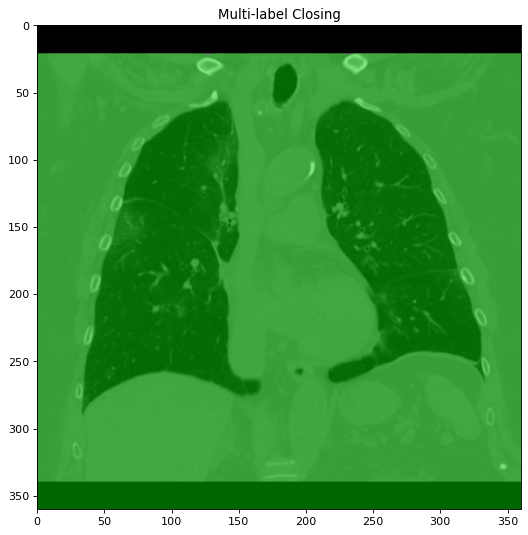

In [20]:
e_img=sitk.BinaryErode(md_img!=0, [radius]*md_img.GetDimension())
mo_img=sitk.Mask(md_img, e_img)
myshow(sitk.LabelOverlay(img, mo_img), "Multi-label Closing")